In [1]:
## Summary 
# Three observable trends
# age

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_json('purchase_data.json')

### Total Number of Players and Player Count

In [4]:
df.SN.nunique()

573

## Purchasing Analysis
#### Number of Unique Items

In [5]:
df['Item ID'].nunique()

183

#### Average Purchase Price

In [6]:
'${:.2f}'.format(df.Price.mean())

'$2.93'

#### Total Number of Purchases

In [7]:
df.shape[0]

780

#### Total Revenue

In [8]:
df.Price.sum()

2286.33

## Gender Demographics

#### Count of players by gender

In [9]:
df.groupby(['SN', 'Gender']).count().reset_index()['Gender'].value_counts()

Male                     465
Female                   100
Other / Non-Disclosed      8
Name: Gender, dtype: int64

#### Percentage of players by gender

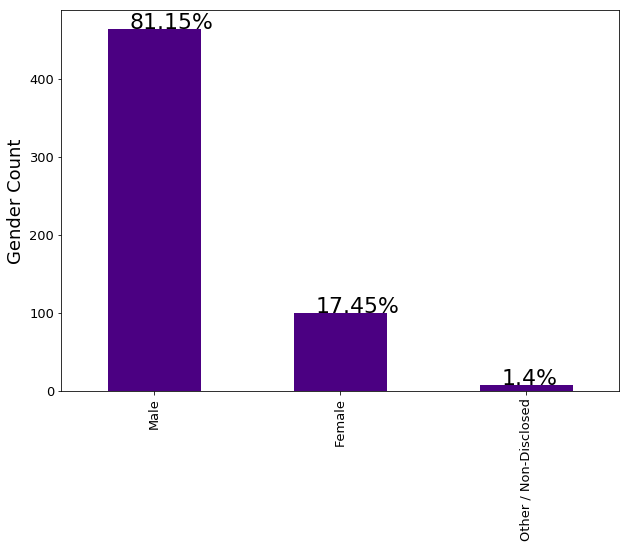

In [10]:
ax2 = df.groupby(['SN', 'Gender']).count().reset_index()['Gender'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="indigo", fontsize=13);
ax2.set_alpha(0.8)
ax2.set_ylabel("Gender Count", fontsize=18);
ax2.set_yticks([i for i in range(0,500,100)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax2.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()+.12, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='black')

## Gender Purchasing Analysis

In [42]:
df.groupby(['Gender', 'SN']).count().reset_index()['Gender'].value_counts()
normed = df.groupby(['Gender', 'SN']).count().reset_index()['Gender'].value_counts(normalize=True)
absolute = df.groupby(['Gender', 'SN']).count().reset_index()['Gender'].value_counts(normalize=False)
gdf = pd.concat([normed, absolute], axis=1)

,Gender,Gender
Male,0.811518,465
Female,0.174520,100
Other / Non-Disclosed,0.013962,8


In [64]:
absolute.

AttributeError: 'Series' object has no attribute 'columns'

In [26]:
df_gender = df.groupby('Gender').agg(['sum', 'mean', 'count'])
df_gender.index

Index(['Female', 'Male', 'Other / Non-Disclosed'], dtype='object', name='Gender')

In [27]:
level0 = df_gender.columns.get_level_values(0)
level1 = df_gender.columns.get_level_values(1)
df_gender.columns = level0 + ' ' + level1
# df_gender = df_gender[['sum', 'mean', 'count']]

In [28]:
df_gender

,Age sum,Age mean,Age count,Item ID sum,Item ID mean,Item ID count,Price sum,Price mean,Price count
Gender,,,,,,,,,
Female,3068,22.558824,136,11983,88.110294,136,382.91,2.815515,136
Male,14360,22.685624,633,57965,91.571880,633,1867.68,2.950521,633
Other / Non-Disclosed,301,27.363636,11,1261,114.636364,11,35.74,3.249091,11


In [29]:
df_gender = df_gender[['Price sum', 'Price mean', 'Price count']]

In [30]:
df_gender

,Price sum,Price mean,Price count
Gender,,,
Female,382.91,2.815515,136
Male,1867.68,2.950521,633
Other / Non-Disclosed,35.74,3.249091,11


In [66]:
df_gender = pd.concat([df_gender,gdf], axis=1)
df_gender['Normalized'] = df_gender.sum / df_gender.Gender.astype('float')
df_gender

TypeError: Could not operate <bound method DataFrame.sum of                        Price sum  Price mean  Price count  Gender  Gender  \
Female                    382.91    2.815515          136     100     100   
Male                     1867.68    2.950521          633     465     465   
Other / Non-Disclosed      35.74    3.249091           11       8       8   

                       Gender    Gender  Gender  
Female                    100  0.174520     100  
Male                      465  0.811518     465  
Other / Non-Disclosed       8  0.013962       8  > with block values unsupported operand type(s) for /: 'method' and 'float'

## Age Demographics

In [12]:
import seaborn as sns

In [13]:
age_df = df[['Age', 'SN']].drop_duplicates()

In [14]:
age_df.shape

(573, 2)

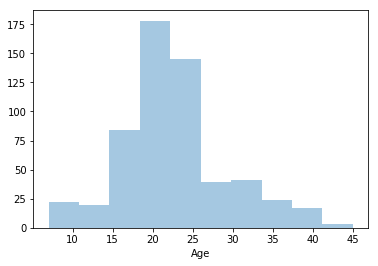

In [15]:
sns.distplot(age_df['Age'], bins=10, kde=False)

In [16]:
ages = [0, 9.9, 14.9, 19.9, 24.9, 29.90, 34.90, 39.90, 99999]
age_groups = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

In [19]:
df['Age_Group'] = pd.cut(df['Age'], ages, labels = age_groups)

age_df['Age_Group'] = pd.cut(age_df['Age'], ages, labels=age_groups)

age_out = pd.concat([age_df.Age_Group.value_counts(normalize=True),\
  age_df.Age_Group.value_counts()], axis=1)
 
age_out.to_dict()['Age_Group']

age_norm = df.groupby('Age_Group').agg(['sum', 'mean', 'count'])['Price']
age_norm.reset_index(inplace=True)

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  import sys


In [23]:
age_norm["unique_buyers"] = age_norm["Age_Group"].map(lambda x: age_out.to_dict()['Age_Group'].get(x))

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [24]:
age_norm['normed_mean'] = age_norm['sum'] / age_norm['unique_buyers'].astype('float')

In [25]:
age_norm

,Age_Group,sum,mean,count,unique_buyers,normed_mean
0,<10,83.46,2.980714,28,19,4.392632
1,10-14,96.95,2.770000,35,23,4.215217
2,15-19,386.42,2.905414,133,100,3.864200
3,20-24,978.77,2.913006,336,259,3.779035
4,25-29,370.33,2.962640,125,87,4.256667
5,30-34,197.25,3.082031,64,47,4.196809
6,35-39,119.40,2.842857,42,27,4.422222
7,40+,53.75,3.161765,17,11,4.886364


## Top Spenders

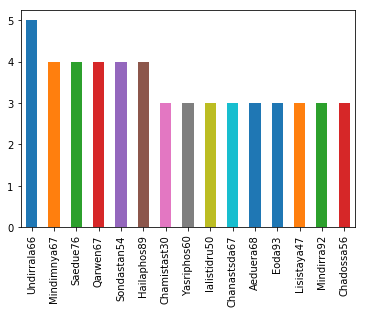

In [43]:
df['SN'].value_counts().head(15).plot.bar();

**Since the value count is the same for the 2nd[1] item and the 6th[5] spenders, I included all of those spenders.**

In [44]:
top_spenders = list(df['SN'].value_counts()[:6].to_dict().keys())

In [45]:
mask_spend = df['SN'].isin(top_spenders)

In [46]:
top_spenders_df = df[mask_spend]

In [47]:
top_spender_purchase_analysis = top_spenders_df.groupby('SN').Price.agg(['count', 'mean', 'sum'])

In [48]:
top_spender_purchase_analysis = top_spender_purchase_analysis.rename(columns={\
            'count': 'Purchase Count', 'mean': 'Ave Purchase Price','sum': 'Total Purchase Value'})
top_spender_purchase_analysis

,Purchase Count,Ave Purchase Price,Total Purchase Value
SN,,,
Hailaphos89,4,1.4675,5.87
Mindimnya67,4,3.1850,12.74
Qarwen67,4,2.4925,9.97
Saedue76,4,3.3900,13.56
Sondastan54,4,2.5600,10.24
Undirrala66,5,3.4120,17.06


## Most Popular Items

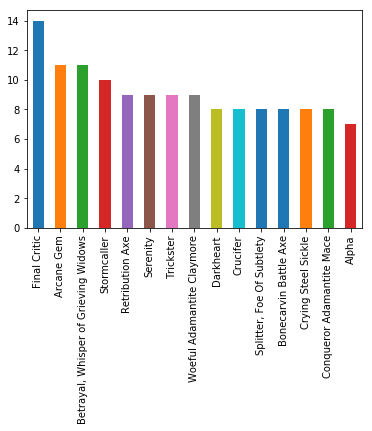

In [49]:
df['Item Name'].value_counts().head(15).plot.bar();

**Since the value count is the same for the 5th item and the 8th items, I included those in top items.**

In [50]:
top_items = list(df['Item Name'].value_counts()[:8].to_dict().keys())


In [51]:
top_items

['Final Critic',
 'Arcane Gem',
 'Betrayal, Whisper of Grieving Widows',
 'Stormcaller',
 'Retribution Axe',
 'Serenity',
 'Trickster',
 'Woeful Adamantite Claymore']

In [52]:
mask = df['Item Name'].isin(top_items)

In [53]:
top_items_df = df[mask]

In [54]:
top_items_df.sort_values(['Item Name']).head()
#TODO should item name be index? how to display top item at the top? 

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
171,21,Male,84,Arcane Gem,2.23,Stryanastip77,20-24
742,26,Male,84,Arcane Gem,2.23,Inguron55,25-29
354,20,Male,84,Arcane Gem,2.23,Mindirra92,20-24
338,17,Male,84,Arcane Gem,2.23,Lisossanya98,15-19
416,25,Male,84,Arcane Gem,2.23,Hiarideu73,25-29


list in a table 
-Purchase Count
-Average Purchase Price
-Total Purchase Value

In [55]:
item_purchase_analysis = top_items_df.groupby('Item Name').Price.agg(['count', 'mean', 'sum']).sort_values\
    (by='count', ascending=False)

In [56]:
item_purchase_analysis = item_purchase_analysis.rename(columns={\
            'count': 'Purchase Count', 'mean': 'Ave Purchase Price','sum': 'Total Purchase Value'})
item_purchase_analysis
#sort by purchase count

,Purchase Count,Ave Purchase Price,Total Purchase Value
Item Name,,,
Final Critic,14,2.757143,38.60
Arcane Gem,11,2.230000,24.53
"Betrayal, Whisper of Grieving Widows",11,2.350000,25.85
Stormcaller,10,3.465000,34.65
Retribution Axe,9,4.140000,37.26
Serenity,9,1.490000,13.41
Trickster,9,2.070000,18.63
Woeful Adamantite Claymore,9,1.240000,11.16


## Most Profitable Items

In [57]:
#Identify the 5 most profitable items by total purchase value, then list (in a table): Item ID, Item Name, 
#Purchase Count, Item Price, Total Purchase Value

In [58]:
most_profitable = df.groupby(['Item Name', 'Item ID', 'Price'])['Price'].agg(['sum', 'count']).\
  sort_values(by='sum', ascending=False).nlargest(5, 'sum')
  #could also put 'count' in where 'sum' is

In [59]:
most_profitable = most_profitable.rename(columns={\
            'count': 'Purchase Count', 'sum': 'Total Purchase Value'})
most_profitable

,,,Total Purchase Value,Purchase Count
Item Name,Item ID,Price,,
Retribution Axe,34,4.14,37.26,9
Spectral Diamond Doomblade,115,4.25,29.75,7
Orenmir,32,4.95,29.70,6
Singed Scalpel,103,4.87,29.22,6
"Splitter, Foe Of Subtlety",107,3.61,28.88,8
